In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [8]:
df2 = pd.read_csv("mental-and-substance-use-as-share-of-disease.csv")
df1 = pd.read_csv("prevalence-by-mental-and-substance-use-disorder.csv")

In [9]:
required_df = pd.merge(df1,df2)
required_df.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


In [10]:
required_df.isnull().sum()
required_df.drop('Code',axis=1,inplace=True)

In [11]:
required_df.size,required_df.shape

(68400, (6840, 10))

In [12]:
required_df.set_axis(['country','year','schizophrenia', 'bipolar disorder ', 'eating disorder ','Anxiety','drug usage','depression','alcohol','Mental Fitness'],axis='columns',inplace=True)

In [13]:
required_df.head()

,country,year,schizophrenia,bipolar disorder,eating disorder,Anxiety,drug usage,depression,alcohol,Mental Fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


heat map of the correlation of the features 

[]

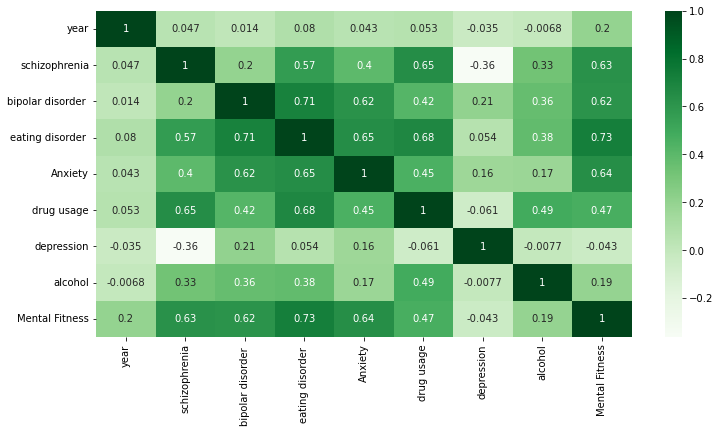

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(required_df.corr(),annot=True,cmap='Greens')
plt.plot()

relation between the features 

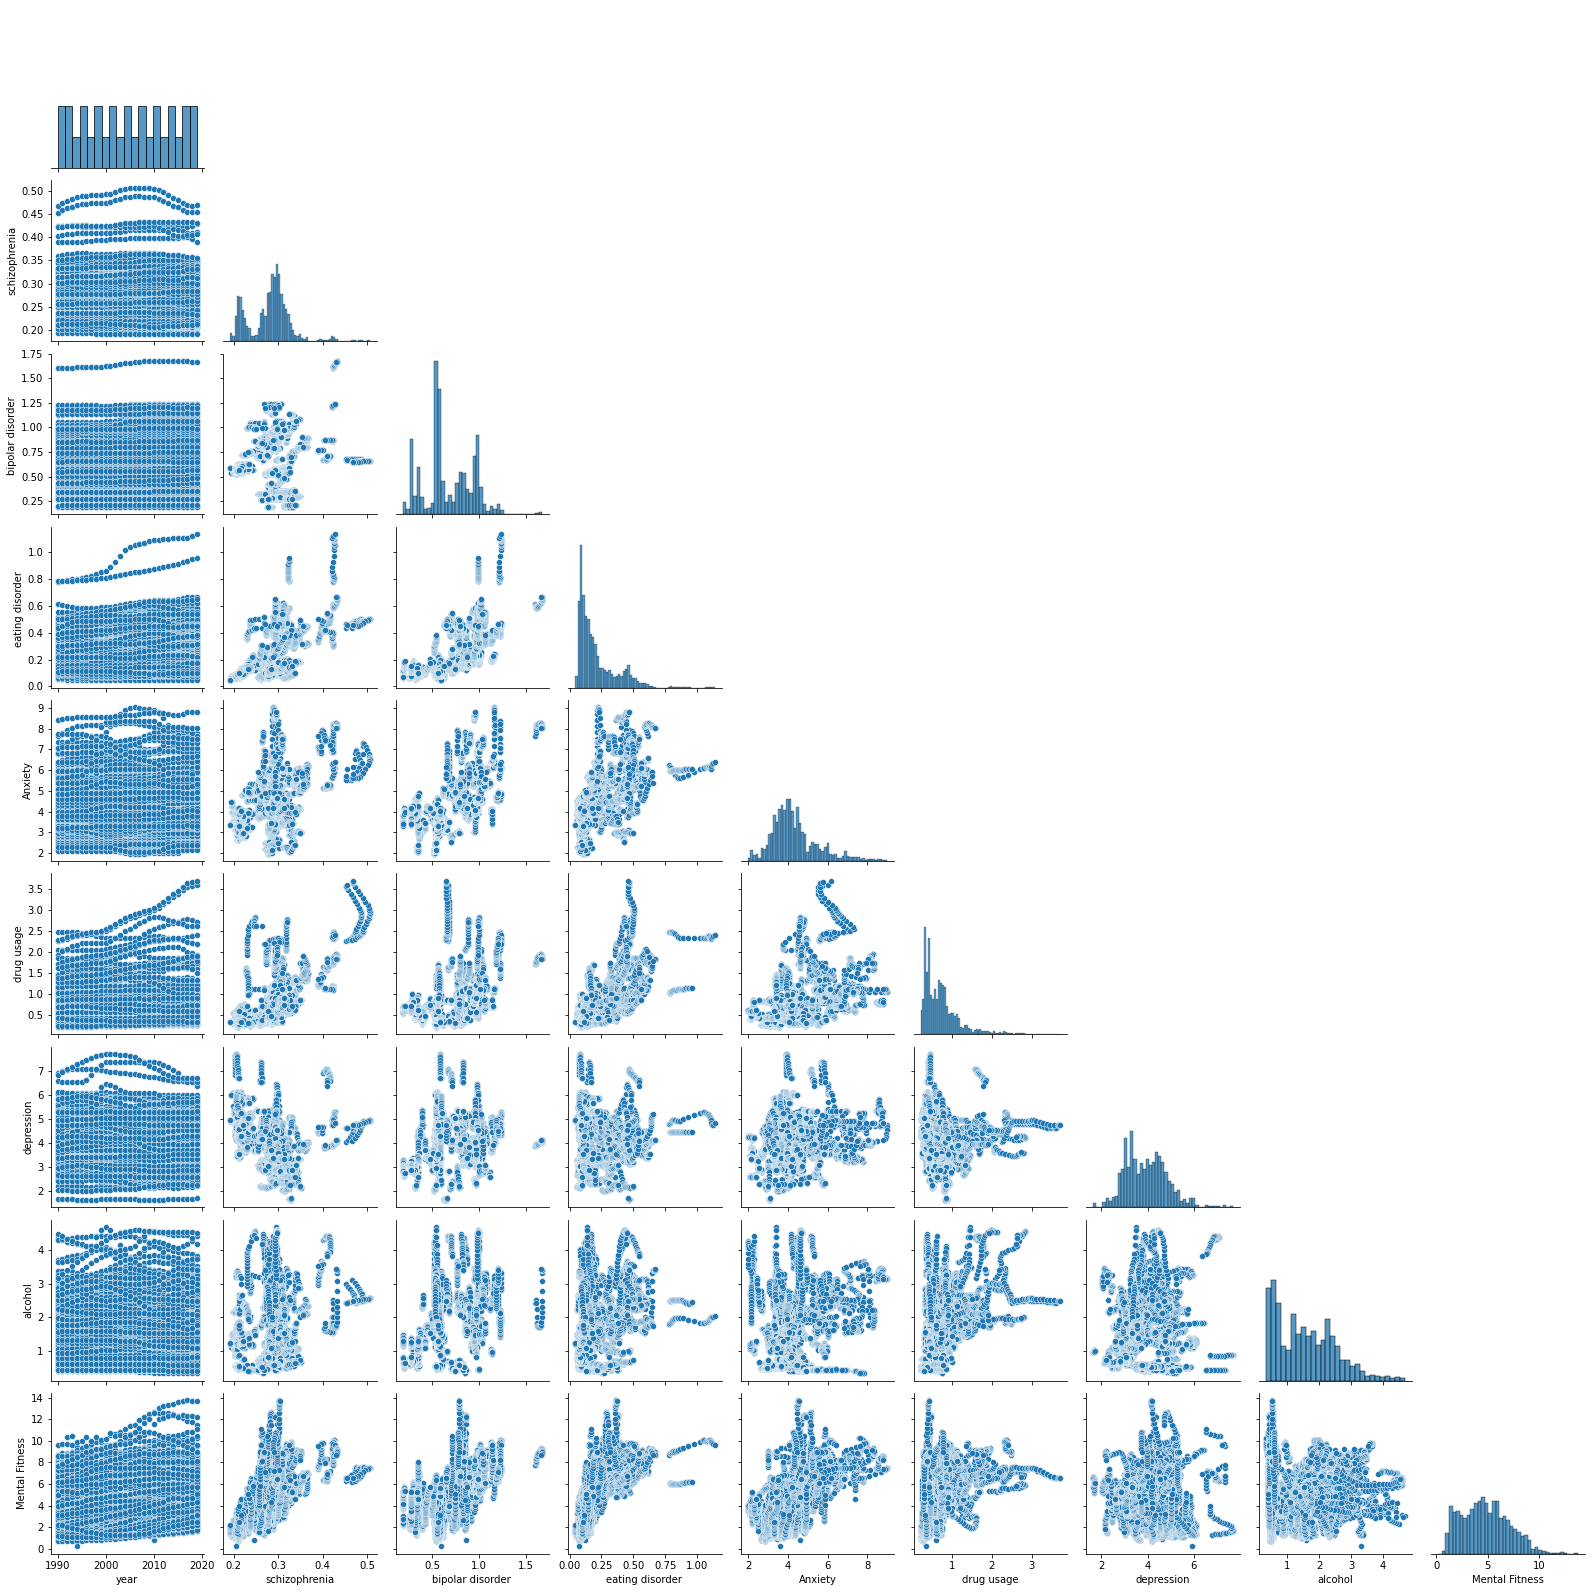

In [14]:
sns.pairplot(required_df,corner=True)
plt.show()

In [15]:
mean = required_df['Mental Fitness'].mean()
anxiety = required_df['Anxiety'].mean()
print('mental fitness mean')
mean


mental fitness mean


4.8180618117506135

In [16]:
pictograph = px.pie(required_df,values='Mental Fitness',names= 'year')
pictograph.show()

In [17]:
pictograph = px.line(required_df,x='year',y='Mental Fitness',color = 'country',markers=True,color_discrete_sequence=['yellow','brown','green','blue'],template='plotly_dark')
pictograph.show()

In [19]:
df =  required_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            6840 non-null   object 
 1   year               6840 non-null   int64  
 2   schizophrenia      6840 non-null   float64
 3   bipolar disorder   6840 non-null   float64
 4   eating disorder    6840 non-null   float64
 5   Anxiety            6840 non-null   float64
 6   drug usage         6840 non-null   float64
 7   depression         6840 non-null   float64
 8   alcohol            6840 non-null   float64
 9   Mental Fitness     6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


In [20]:
from sklearn.preprocessing import LabelEncoder
lab =  LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = lab.fit_transform(df[i])

In [21]:
df.shape

(6840, 10)

Splitting the data for training and testing 

In [22]:
X = df.drop('Mental Fitness',axis=1)
y= df['Mental Fitness']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size =.20,random_state= 2)

In [23]:
print("xtrain: ",xtrain.shape)
print("xtest: ",xtest.shape)
print("\nytrain; ",ytrain.shape)
print("ytest:",ytest.shape)

xtrain:  (5472, 9)
xtest:  (1368, 9)

ytrain;  (5472,)
ytest: (1368,)


# using scikit-learn machine models  

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ytrain_pred = lr.predict(xtrain)
mse = mean_squared_error(ytrain,ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
r2 =r2_score(ytrain,ytrain_pred)
print("the linear regression model performance for training set")
print('-----------------------------------------------------')
print('MSE in {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


the linear regression model performance for training set
-----------------------------------------------------
MSE in 1.3899593724057975
RMSE is 1.1789653821914354
R2 score is 0.7413245790025276


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ytrain_pred = rf.predict(xtrain)
mse  = mean_squared_error(ytrain,ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
r2 = r2_score(ytrain,ytrain_pred)
print("the Random forest regression model performance for training set")
print('-----------------------------------------------------')
print('MSE in {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


the Random forest regression model performance for training set
-----------------------------------------------------
MSE in 0.005100737457825931
RMSE is 0.07141944733632381
R2 score is 0.9990507381471035


## Evaluating the model with the testing data 

In [28]:
ytest_pred = lr.predict(xtest)
mse = mean_squared_error(ytest,ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest,ytest_pred)))
r2 = r2_score(ytest,ytest_pred)
print("the Linear regression model performance for training set")
print('-----------------------------------------------------')
print('MSE in {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

ytest_pred = rf.predict(xtest)
mse = mean_squared_error(ytest,ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest,ytest_pred)))
r2 = r2_score(ytest,ytest_pred)

print("\nthe Random forest regression model performance for training set")
print('-----------------------------------------------------')
print('MSE in {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

the Linear regression model performance for training set
-----------------------------------------------------
MSE in 1.1357545319272389
RMSE is 1.0657178481789815
R2 score is 0.7638974087055272

the Random forest regression model performance for training set
-----------------------------------------------------
MSE in 0.029493314947630765
RMSE is 0.1717361783306906
R2 score is 0.993868879331537


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# creating a container of the model and to visulize and and peformance of the machine models with current data sets .

In [29]:

model_performance = {}

# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(xtrain, ytrain)
ridge_y_pred = ridge_model.predict(xtest)
ridge_mse = mean_squared_error(ytest, ridge_y_pred)
ridge_r2 = r2_score(ytest, ridge_y_pred)
model_performance['1. Ridge Regression'] = {'MSE': ridge_mse, 'R-squared': ridge_r2}

In [30]:
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(xtrain, ytrain)
lasso_y_pred = lasso_model.predict(xtest)
lasso_mse = mean_squared_error(ytest, lasso_y_pred)
lasso_r2 = r2_score(ytest, lasso_y_pred)
model_performance['2. Lasso Regression'] = {'MSE': lasso_mse, 'R-squared': lasso_r2}

In [31]:
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(xtrain, ytrain)
elastic_net_y_pred = elastic_net_model.predict(xtest)
elastic_net_mse = mean_squared_error(ytest, elastic_net_y_pred)
elastic_net_r2 = r2_score(ytest, elastic_net_y_pred)
model_performance['3. Elastic Net Regression'] = {'MSE': elastic_net_mse, 'R-squared': elastic_net_r2}

In [34]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(xtrain)
poly_model = LinearRegression()
poly_model.fit(X_poly, ytrain)
X_test_poly = poly_features.transform(xtest)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(ytest, poly_y_pred)
poly_r2 = r2_score(ytest, poly_y_pred)
model_performance['4. Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2}

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(xtrain, ytrain)
tree_y_pred = tree_model.predict(xtest)
tree_mse = mean_squared_error(ytest, tree_y_pred)
tree_r2 = r2_score(ytest, tree_y_pred)
model_performance['5. Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2}

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(xtrain, ytrain)
forest_y_pred = forest_model.predict(xtest)
forest_mse = mean_squared_error(ytest, forest_y_pred)
forest_r2 = r2_score(ytest, forest_y_pred)
model_performance['6. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

# SVR (Support Vector Regression)
svr_model = SVR()
svr_model.fit(xtrain, ytrain)
svr_y_pred = svr_model.predict(xtest)
svr_mse = mean_squared_error(ytest, svr_y_pred)
svr_r2 = r2_score(ytest, svr_y_pred)
model_performance['7. Support Vector Regression'] = {'MSE': svr_mse, 'R-squared': svr_r2}



# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(xtrain, ytrain)
knn_y_pred = knn_model.predict(xtest)
knn_mse = mean_squared_error(ytest, knn_y_pred)
knn_r2 = r2_score(ytest, knn_y_pred)
model_performance['9. K-Nearest Neighbors Regression'] = {'MSE': knn_mse, 'R-squared': knn_r2}

# Bayesian Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(xtrain, ytrain)
bayesian_y_pred = bayesian_model.predict(xtest)
bayesian_mse = mean_squared_error(ytest, bayesian_y_pred)
bayesian_r2 = r2_score(ytest, bayesian_y_pred)
model_performance['10. Bayesian Regression'] = {'MSE': bayesian_mse, 'R-squared': bayesian_r2}

# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(xtrain, ytrain)
nn_y_pred = nn_model.predict(xtest)
nn_mse = mean_squared_error(ytest, nn_y_pred)
nn_r2 = r2_score(ytest, nn_y_pred)
model_performance['11. Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2}

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(xtrain, ytrain)
gb_y_pred = gb_model.predict(xtest)
gb_mse = mean_squared_error(ytest, gb_y_pred)
gb_r2 = r2_score(ytest, gb_y_pred)
model_performance['12. Gradient Boosting Regression'] = {'MSE': gb_mse, 'R-squared': gb_r2}

# Print model performance
for model, performance in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'])
    print()

Model: 1. Ridge Regression
   Mean Squared Error (MSE): 1.1393226139229882
   R-squared Score: 0.7631556697280758

Model: 2. Lasso Regression
   Mean Squared Error (MSE): 2.77027174365998
   R-squared Score: 0.4241111799412295

Model: 3. Elastic Net Regression
   Mean Squared Error (MSE): 2.740266404991704
   R-squared Score: 0.4303487409749742

Model: 4. Polynomial Regression
   Mean Squared Error (MSE): 0.5365987525674473
   R-squared Score: 0.8884509351227732

Model: 5. Decision Tree Regression
   Mean Squared Error (MSE): 0.08829481425281871
   R-squared Score: 0.9816451232577691

Model: 6. Random Forest Regression
   Mean Squared Error (MSE): 0.031819017337508845
   R-squared Score: 0.9933854083478041

Model: 7. Support Vector Regression
   Mean Squared Error (MSE): 4.791171391724006
   R-squared Score: 0.0040031105995591565

Model: 9. K-Nearest Neighbors Regression
   Mean Squared Error (MSE): 1.0049803438106724
   R-squared Score: 0.7910829702162167

Model: 10. Bayesian Regressi

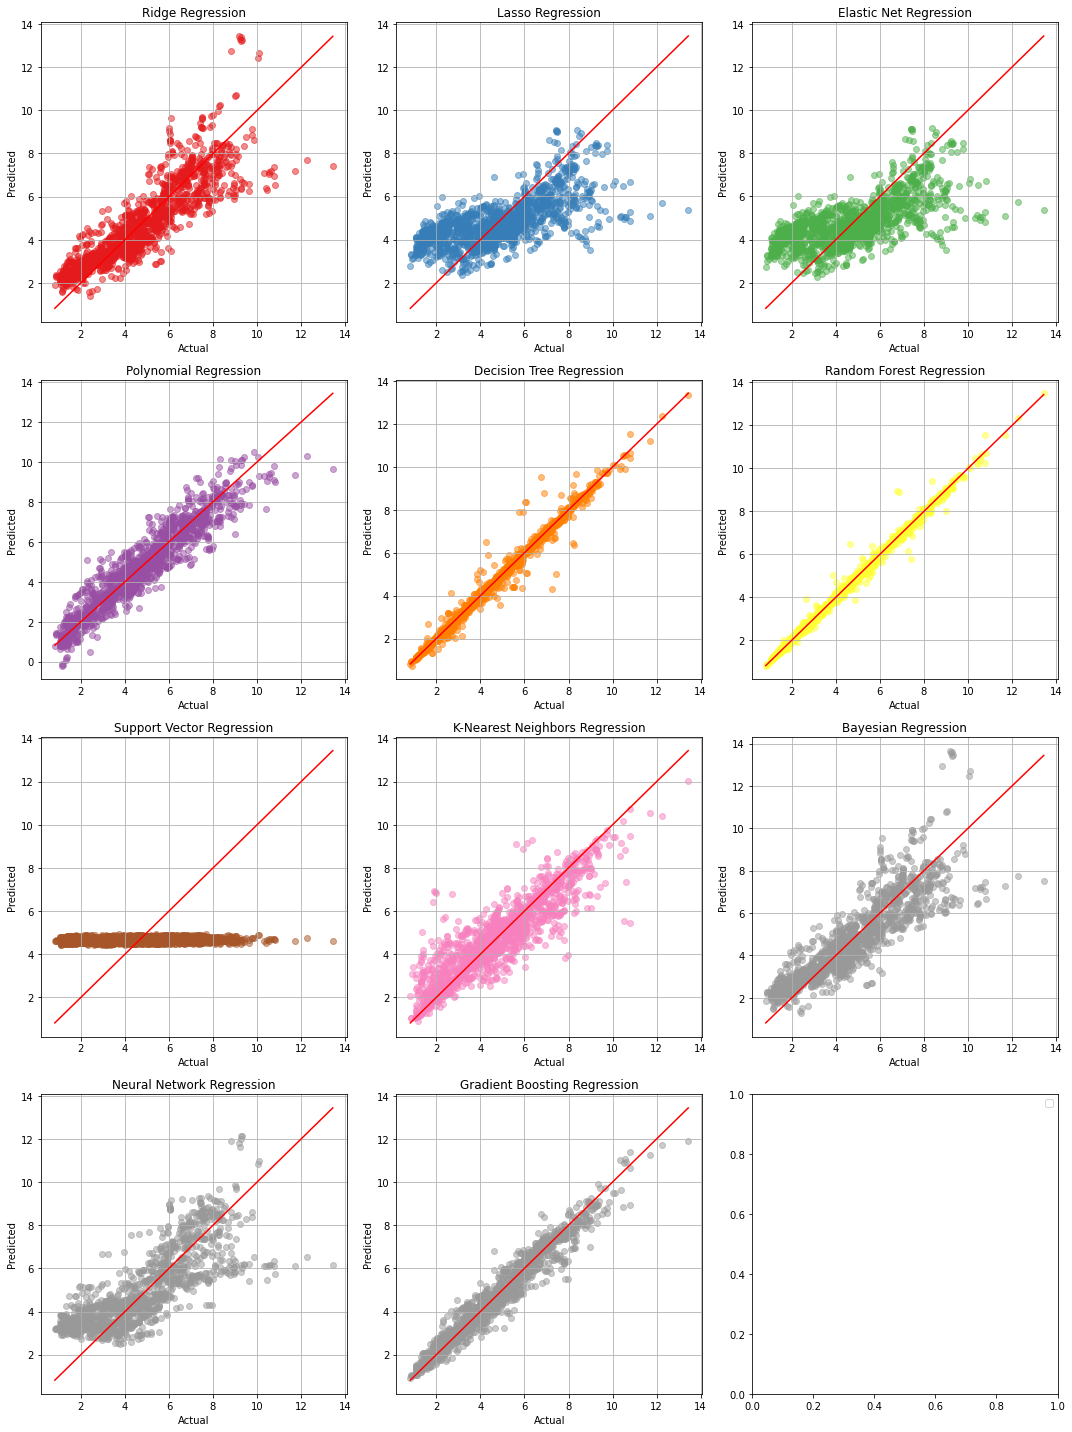

In [47]:
# Create a dictionary to store the model performance
model_performance = {
    'Ridge Regression': {'Predicted': ridge_y_pred, 'Actual': ytest},
    'Lasso Regression': {'Predicted': lasso_y_pred, 'Actual': ytest},
    'Elastic Net Regression': {'Predicted': elastic_net_y_pred, 'Actual': ytest},
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': ytest},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': ytest},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': ytest},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': ytest},
    
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': ytest},
    'Bayesian Regression': {'Predicted': bayesian_y_pred, 'Actual': ytest},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': ytest},
    'Gradient Boosting Regression': {'Predicted': gb_y_pred, 'Actual': ytest}
}

# Set up figure and axes
num_models = len(model_performance)
num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Define color palette
color_palette = plt.cm.Set1(range(num_models))

# Iterate over the models and plot the predicted vs actual values
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Get the predicted and actual values
    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    # Scatter plot of predicted vs actual values
    ax.scatter(y_actual, y_pred, color=color_palette[i], alpha=0.5, marker='o')

    # Add a diagonal line for reference
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    # Set the title and labels
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Add gridlines
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Create a legend
plt.legend(model_performance.keys(), loc='upper right')

# Show the plot
plt.show()


In [48]:
# Store the regression models and their scores in a dictionary
regression_scores = {
    "Ridge Regression": (ridge_mse, ridge_r2),
    "Elastic Net Regression": (elastic_net_mse, elastic_net_r2),
    "Polynomial Regression": (poly_mse, poly_r2),
    "Random Forest Regression": (forest_mse, forest_r2),
    "Gradient Boosting Regression": (gb_mse, gb_r2),
    "Decision Tree Regression": (tree_mse, tree_r2),
    "Lasso Regression": (lasso_mse, lasso_r2),
    "Support Vector Regression": (svr_mse, svr_r2),
    
    "K-Nearest Neighbors Regression": (knn_mse, knn_r2),
    "Bayesian Regression": (bayesian_mse, bayesian_r2),
    "Neural Network Regression": (nn_mse, nn_r2),
}

# Sort the regression models based on MSE in ascending order and R-squared score in descending order
sorted_models = sorted(regression_scores.items(), key=lambda x: (x[1][0], -x[1][1]))

print("Regression Models in Order of Precision:")
for i, (model, scores) in enumerate(sorted_models, start=1):
    print(f"{i}. {model}")
    print("   Mean Squared Error (MSE):", scores[0])
    print("   R-squared Score:", scores[1])
    print()

most_precise_model = sorted_models[0][0]
least_precise_model = sorted_models[-1][0]

print(f"The most precise model is: {most_precise_model}")
print(f"The least precise model is: {least_precise_model}")

Regression Models in Order of Precision:
1. Random Forest Regression
   Mean Squared Error (MSE): 0.031819017337508845
   R-squared Score: 0.9933854083478041

2. Decision Tree Regression
   Mean Squared Error (MSE): 0.08829481425281871
   R-squared Score: 0.9816451232577691

3. Gradient Boosting Regression
   Mean Squared Error (MSE): 0.2453728051010279
   R-squared Score: 0.9489914823238779

4. Polynomial Regression
   Mean Squared Error (MSE): 0.5365987525674473
   R-squared Score: 0.8884509351227732

5. K-Nearest Neighbors Regression
   Mean Squared Error (MSE): 1.0049803438106724
   R-squared Score: 0.7910829702162167

6. Bayesian Regression
   Mean Squared Error (MSE): 1.135667232782996
   R-squared Score: 0.7639155566006878

7. Ridge Regression
   Mean Squared Error (MSE): 1.1393226139229882
   R-squared Score: 0.7631556697280758

8. Neural Network Regression
   Mean Squared Error (MSE): 1.8863887413434741
   R-squared Score: 0.6078542876125224

9. Elastic Net Regression
   Mean 